<div class="alert alert-block alert-info">

Business Case 1<a class="anchor"><a id='toc'></a></b><br>
* [<font color='#E8800A'>Import Libraries</font>](#first-bullet)<br>
- [<font color='#E8800A'>Data Exploration</font>](#second-bullet)<br>
- [<font color='#E8800A'>Exploratory Analysis</font>](#third-bullet)<br>
- [<font color='#E8800A'>Outlier </font>](#fourth-bullet)<br>
- [<font color='#E8800A'>RFM</font>](#fifth-bullet)<br>
- [<font color='#E8800A'>Groups</font>](#sixth-bullet)<br>
- [<font color='#E8800A'>RFM and Merged data Analysis</font>](#seventh-bullet)<br>
- [<font color='#E8800A'>Tsni</font>](#eigth-bullet)<br>
- [<font color='#E8800A'>Decision Tree Evaluation</font>](#ninth-bullet)<br> 

</div>

# <font color='#E8800A'>Import Libraries</font> <a class="anchor" id="first-bullet"></a>
  [Back to TOC](#toc)

In [1]:
#regular libraries 
import pandas as pd
import numpy as np
import scipy
import sklearn
import os
import matplotlib.pyplot as plt
import seaborn as sns

#Pre processing
import statsmodels.api as sm ##Stats
from sklearn import preprocessing ##Normalize feature
import missingno as msno 
import datetime as dt
from itertools import product
from pandas_profiling import ProfileReport
import calendar
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_selection import RFE ##Test Features and select the best ones
from sklearn.linear_model import LogisticRegression ##Test Features and select the best ones
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.neighbors import LocalOutlierFactor

#Clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.manifold import TSNE

#Modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

#Evaluation
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn.metrics import classification_report, confusion_matrix, precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_score
from joblib import dump
from pathlib import Path

# Defining PROJECT_ROOT
PROJECT_ROOT = Path(os.path.abspath('')).resolve().parents[0]


# <font color='#E8800A'>Data Exploration</font> <a class="anchor" id="Second-bullet"></a>
  [Back to TOC](#toc)

In [2]:
data = pd.read_excel(r'WonderfulWinesoftheWorld.xlsx')

In [3]:
#Check the info from variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Custid       10000 non-null  float64
 1   Dayswus      10001 non-null  float64
 2   Age          10001 non-null  float64
 3   Edu          10001 non-null  float64
 4   Income       10001 non-null  float64
 5   Kidhome      10001 non-null  float64
 6   Teenhome     10001 non-null  float64
 7   Freq         10001 non-null  float64
 8   Recency      10001 non-null  float64
 9   Monetary     10001 non-null  float64
 10  LTV          10001 non-null  float64
 11  Perdeal      10001 non-null  float64
 12  Dryred       10001 non-null  float64
 13  Sweetred     10001 non-null  float64
 14  Drywh        10001 non-null  float64
 15  Sweetwh      10001 non-null  float64
 16  Dessert      10001 non-null  float64
 17  Exotic       10001 non-null  float64
 18  WebPurchase  10001 non-null  float64
 19  WebV

In [4]:
#Were identified that the last line of the database wasn't a data 
data.tail()

,Custid,Dayswus,Age,Edu,Income,Kidhome,Teenhome,Freq,Recency,Monetary,...,SMRack,LGRack,Humid,Spcork,Bucket,Access,Complain,Mailfriend,Emailfriend,Rand
9996,4070.0,596.000,66.0000,15.0000,84714.000,0.0000,0.0000,18.0000,45.0000,720.0000,...,0,0,0,0,0,0,0,0,0,0.905248
9997,7909.0,619.000,18.0000,12.0000,40466.000,0.0000,0.0000,3.0000,65.0000,47.0000,...,0,0,0,0,0,0,0,0,0,0.679388
9998,4158.0,1107.000,33.0000,16.0000,53661.000,1.0000,0.0000,1.0000,368.0000,15.0000,...,0,0,0,0,0,0,0,0,0,0.016766
9999,4914.0,979.000,55.0000,16.0000,94926.000,0.0000,1.0000,25.0000,28.0000,1148.0000,...,0,0,0,0,0,0,0,0,0,0.362494
10000,NaN,898.102,47.9273,16.7391,69904.358,0.4188,0.4698,14.6281,62.4068,622.5552,...,817,696,817,682,130,2460,112,1019,511,NaN


In [5]:
#check the mean from rows to see if the last row is observation or mean
data.loc[:10000,'Dayswus'].mean()

898.102

In [6]:
#Delete variable Rand (Random number without significance)
data.drop(columns = 'Rand', inplace = True)
#Delete last row from the data since this is the mean from the observations and not a customer.
data.drop(index = 10000, inplace = True)
#Delete Custid since this isn't going to enter in our models.
data.drop(columns = 'Custid', inplace = True)

In [7]:
#Define function to find the binary features.
def bool_cols(df):
    bool_cols = [col for col in df 
                 if np.isin(df[col].dropna().unique(), [0, 1]).all()]
    return(bool_cols)

In [8]:
#Separate the variables in binary and continuous. 
bin_feat = bool_cols(data)
cont_feat = data.drop(columns = bool_cols(data)).columns.to_list()

In [9]:
#Confirm the values of access column
data['Access'].value_counts()

0    8009
1    1579
2     355
3      57
Name: Access, dtype: int64

# <font color='#E8800A'>Exploratory Analysis</font> <a class="anchor" id="third-bullet"></a>
  [Back to TOC](#toc)

<Figure size 864x432 with 0 Axes>

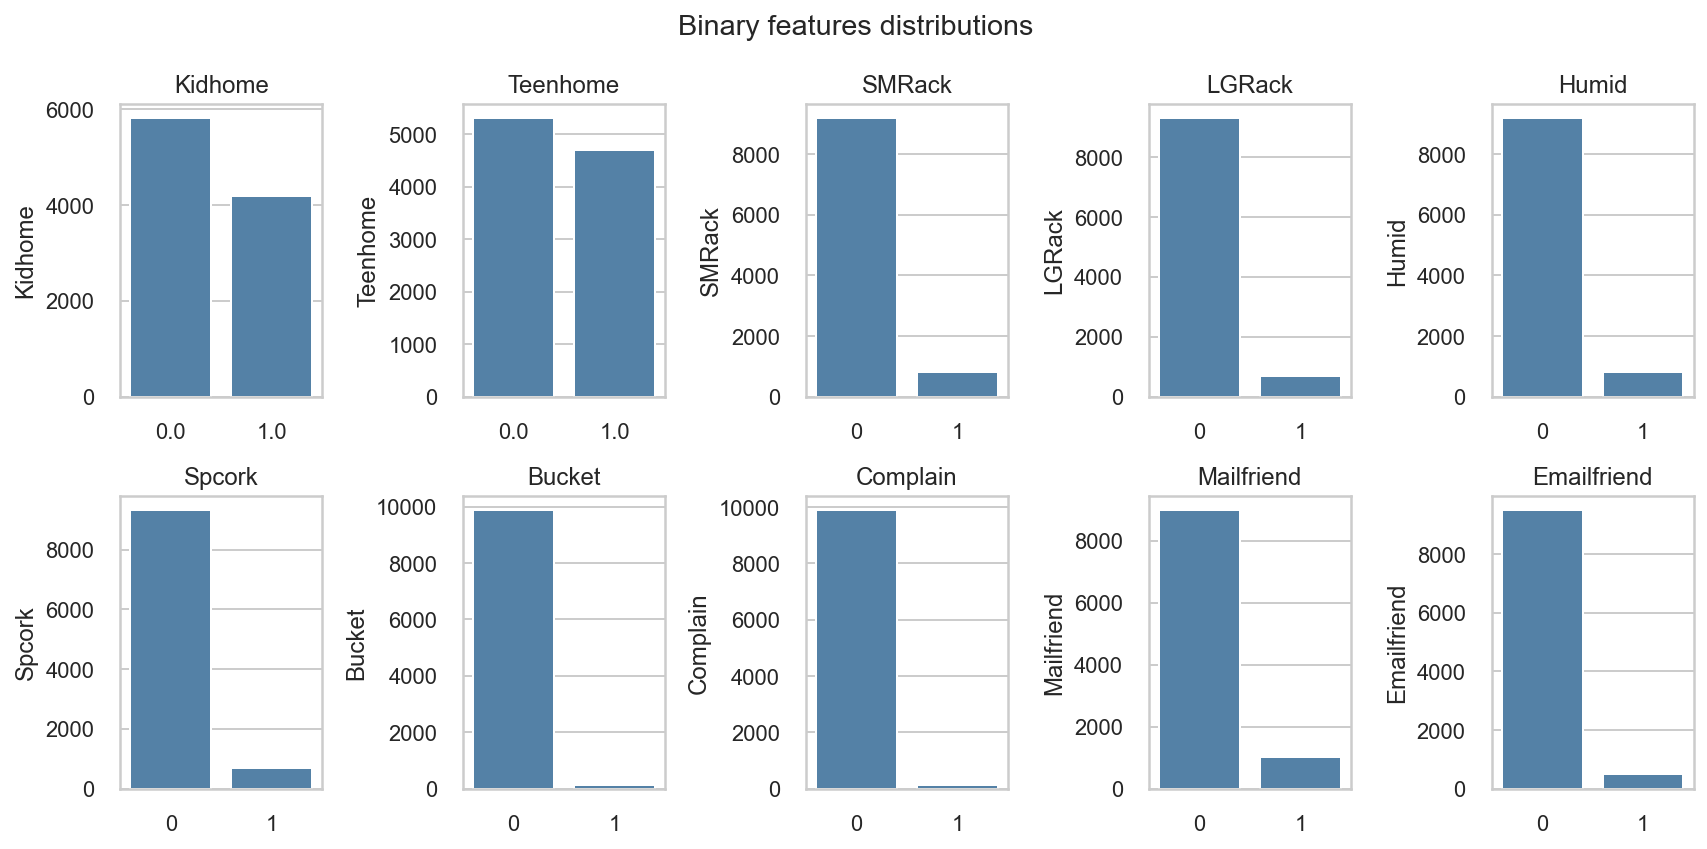

In [10]:
#Binary Distributions

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set_theme(style="whitegrid")
sns.set_palette("deep")

# Plot the distribution of the categorical features.
plt.figure(figsize=(12,6))

rows = 2
col = 5
fig, axs = plt.subplots(rows, col)
fig.set_size_inches(12, 6)
fig.suptitle("Binary features distributions")

cat_feat_plot = bin_feat

features = np.resize(np.array(cat_feat_plot),(rows, col))
for i in range(rows):
    for j in range(col):
        if i >= 2 & j >= 1: break
        sns.barplot(ax = axs[i,j], y=data[features[i,j]].value_counts(), x = data[features[i,j]].value_counts().index, color="steelblue")
        axs[i,j].set_title(features[i,j])
        axs[i,j].tick_params(axis='x', labelrotation= 0) 
        
            
fig.tight_layout()
plt.show()

<Figure size 1152x576 with 0 Axes>

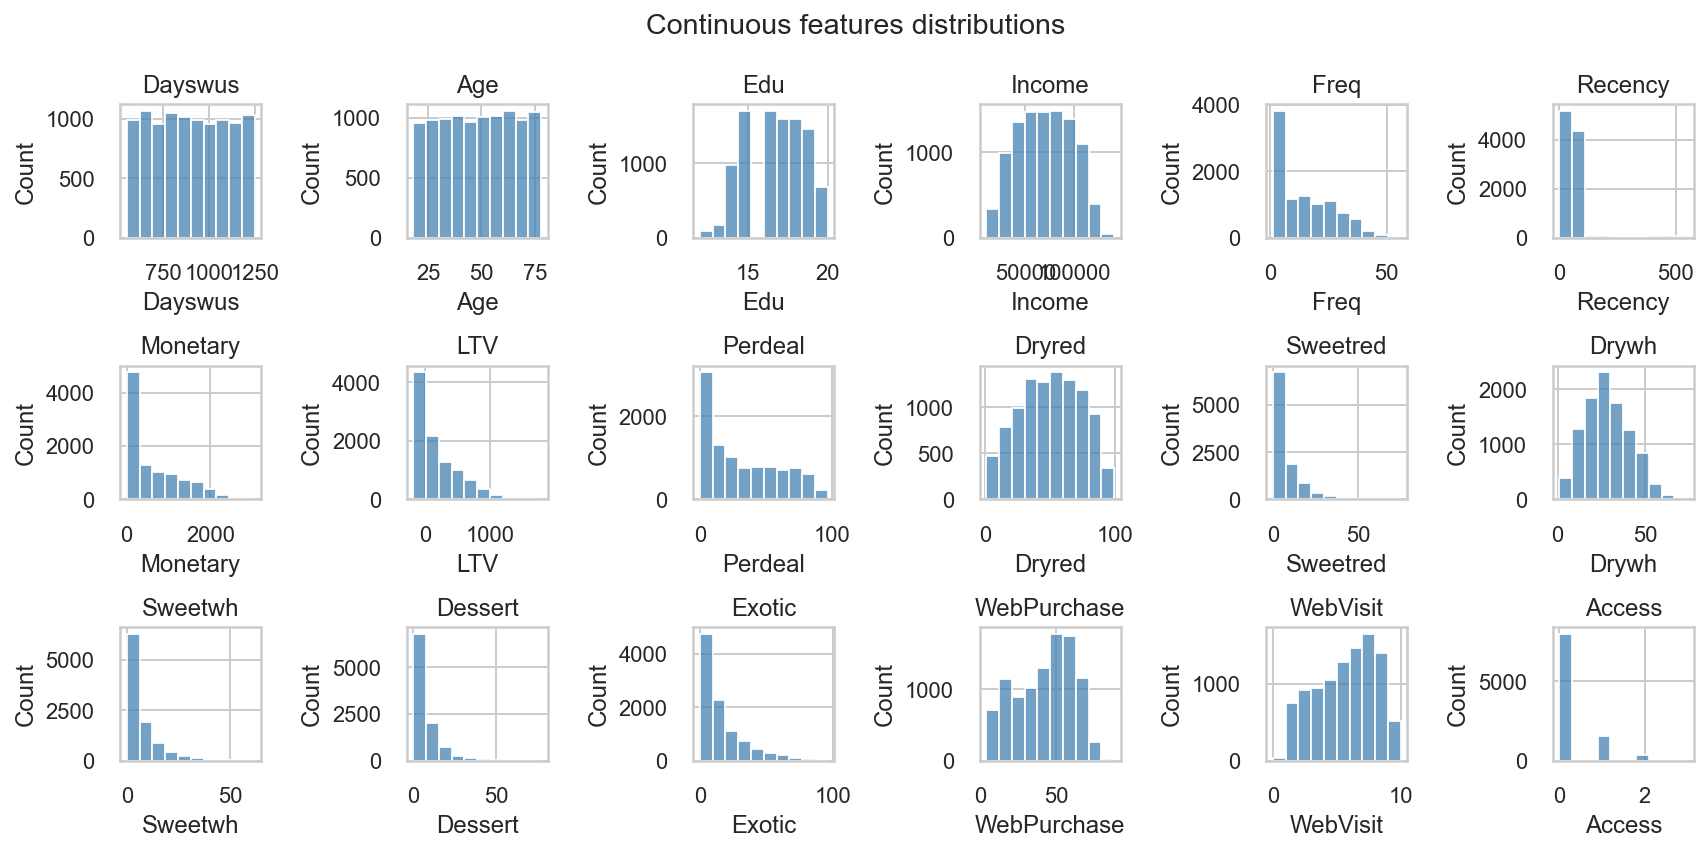

In [11]:
# Continuous features
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set_theme(style="whitegrid")
sns.set_palette("deep")

# Plot the distribution of the categorical features.
plt.figure(figsize=(16,8))

rows = 3
col = 6
fig, axs = plt.subplots(rows, col)
fig.set_size_inches(12, 6)
fig.suptitle("Continuous features distributions")

features = np.resize(np.array(cont_feat),(rows, col))
for i in range(rows):
    for j in range(col):
        if i >= 3 & j >= 6: break
        sns.histplot(ax = axs[i,j], data=data[features[i,j]].value_counts(), x = data[features[i,j]], color="steelblue", bins = 10)
        axs[i,j].set_title(features[i,j])
        axs[i,j].tick_params(axis='x', labelrotation= 0) 
        
            
fig.tight_layout()
plt.show()



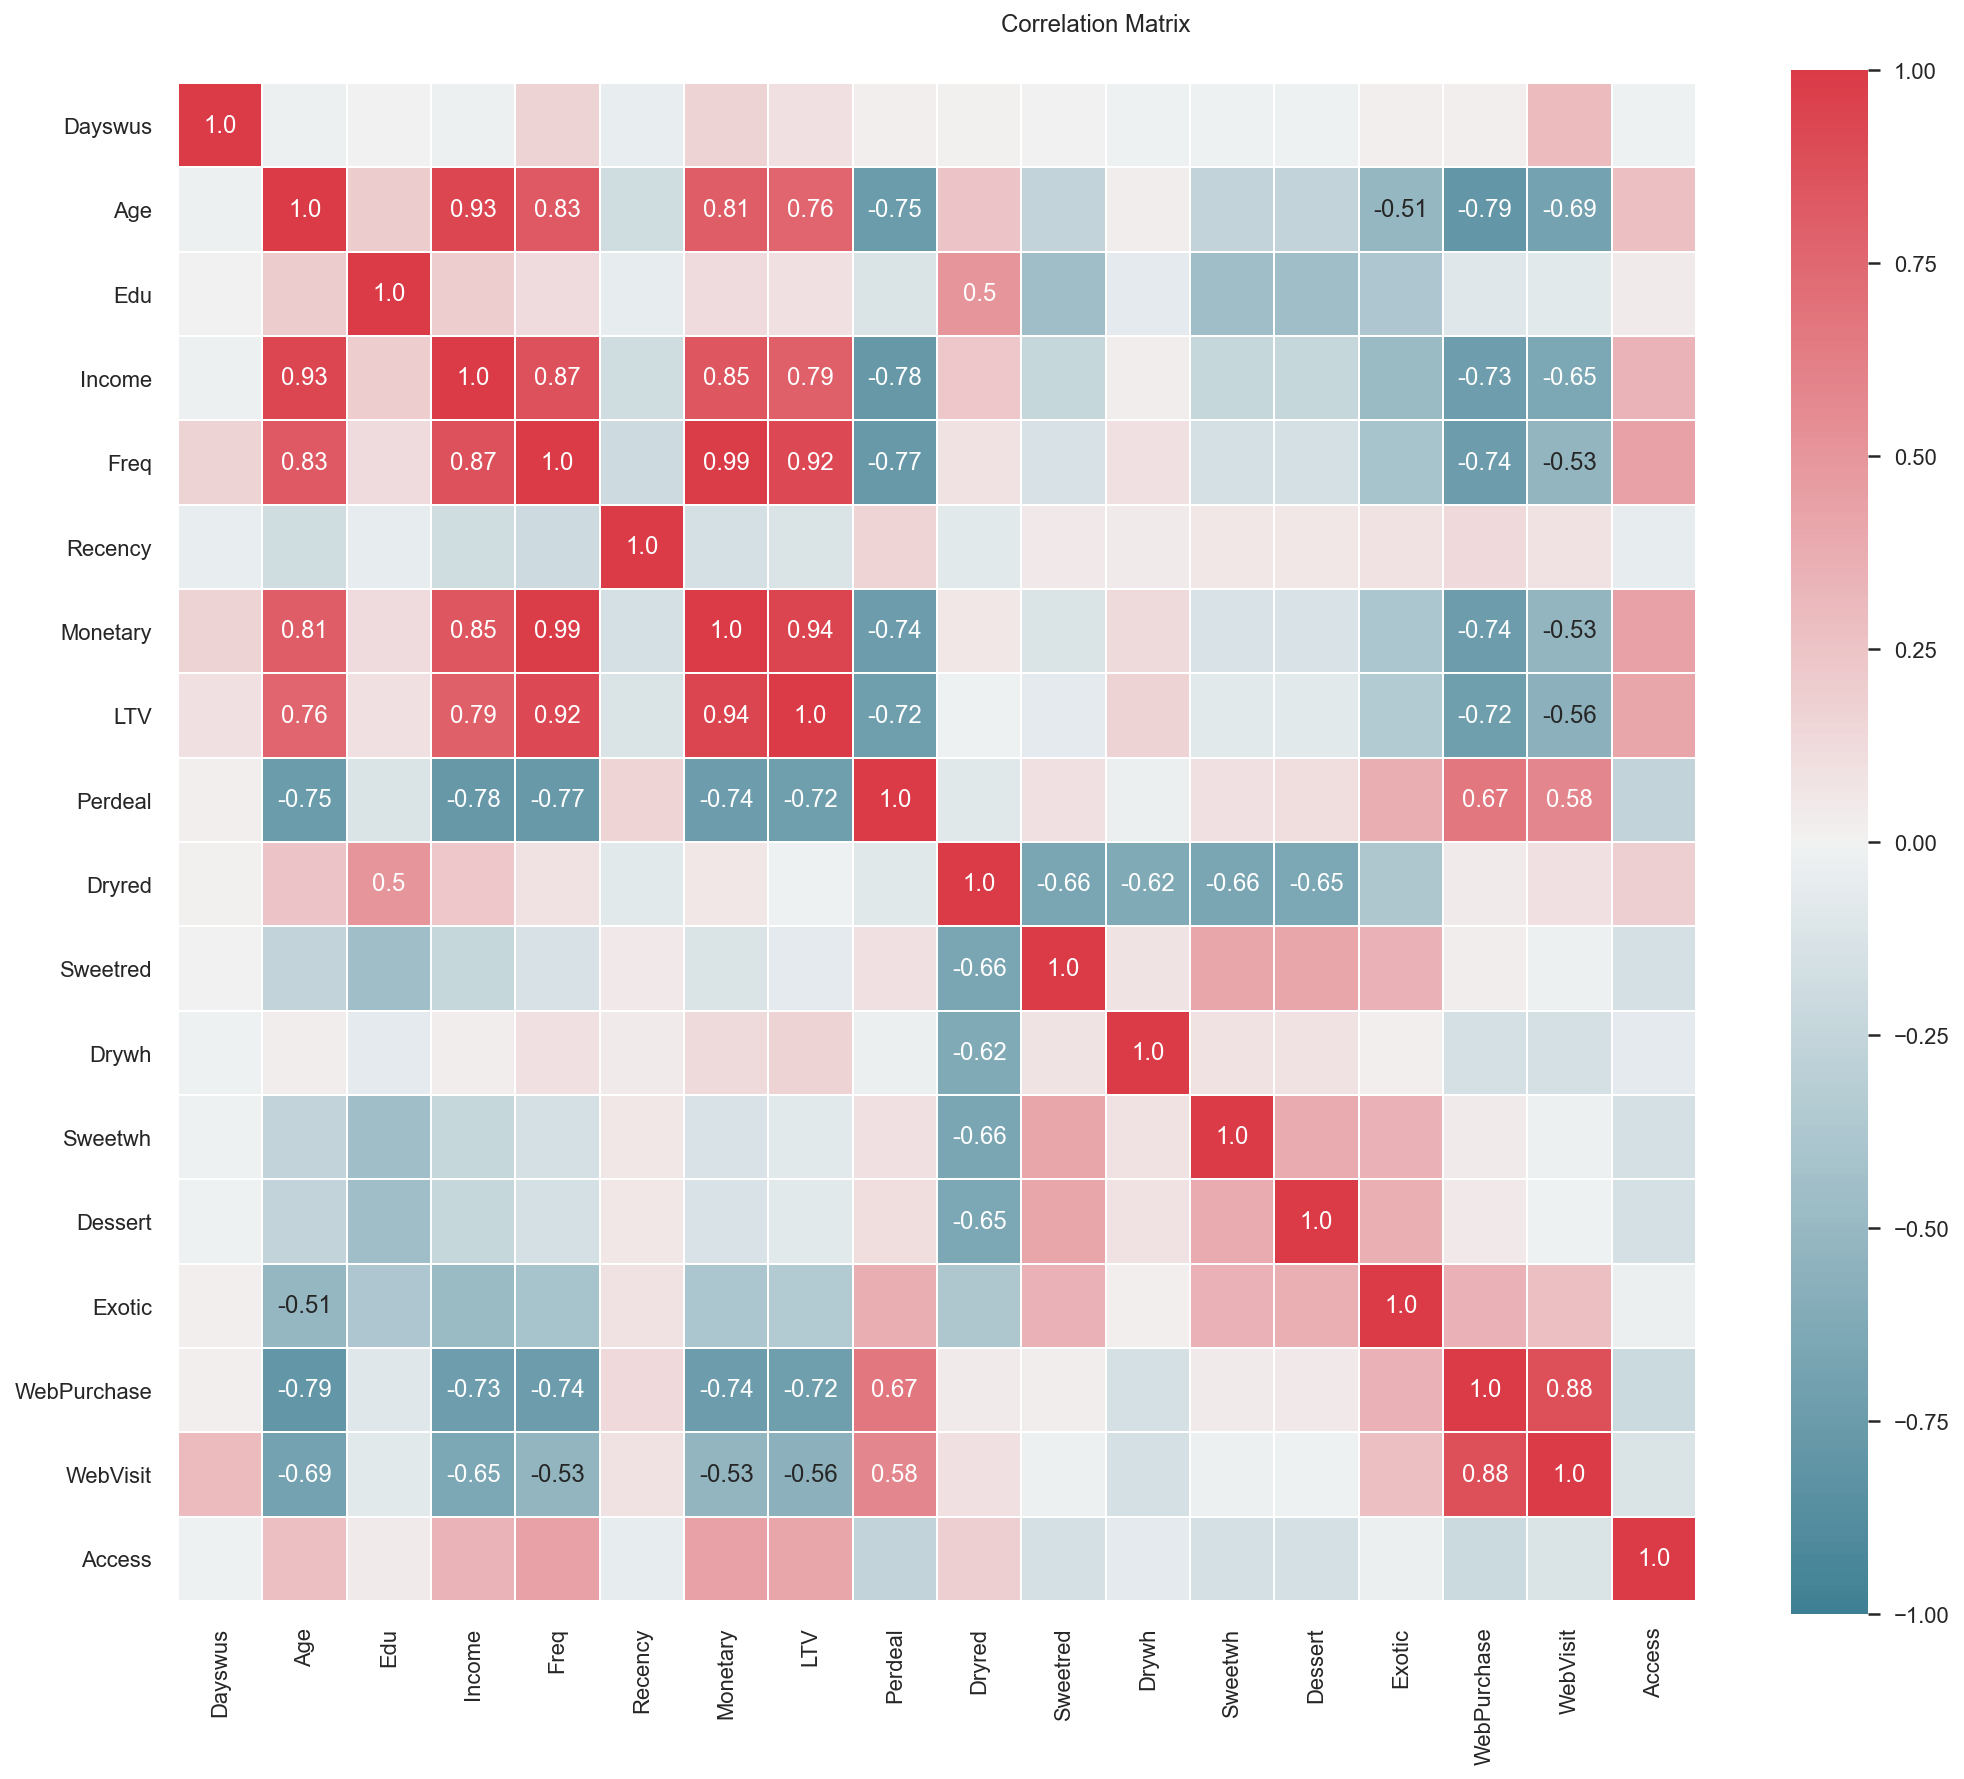

In [12]:
# Correlation analysis for continuous features

fig = plt.figure(figsize=(17, 13))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(data[cont_feat].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=12)
plt.show()

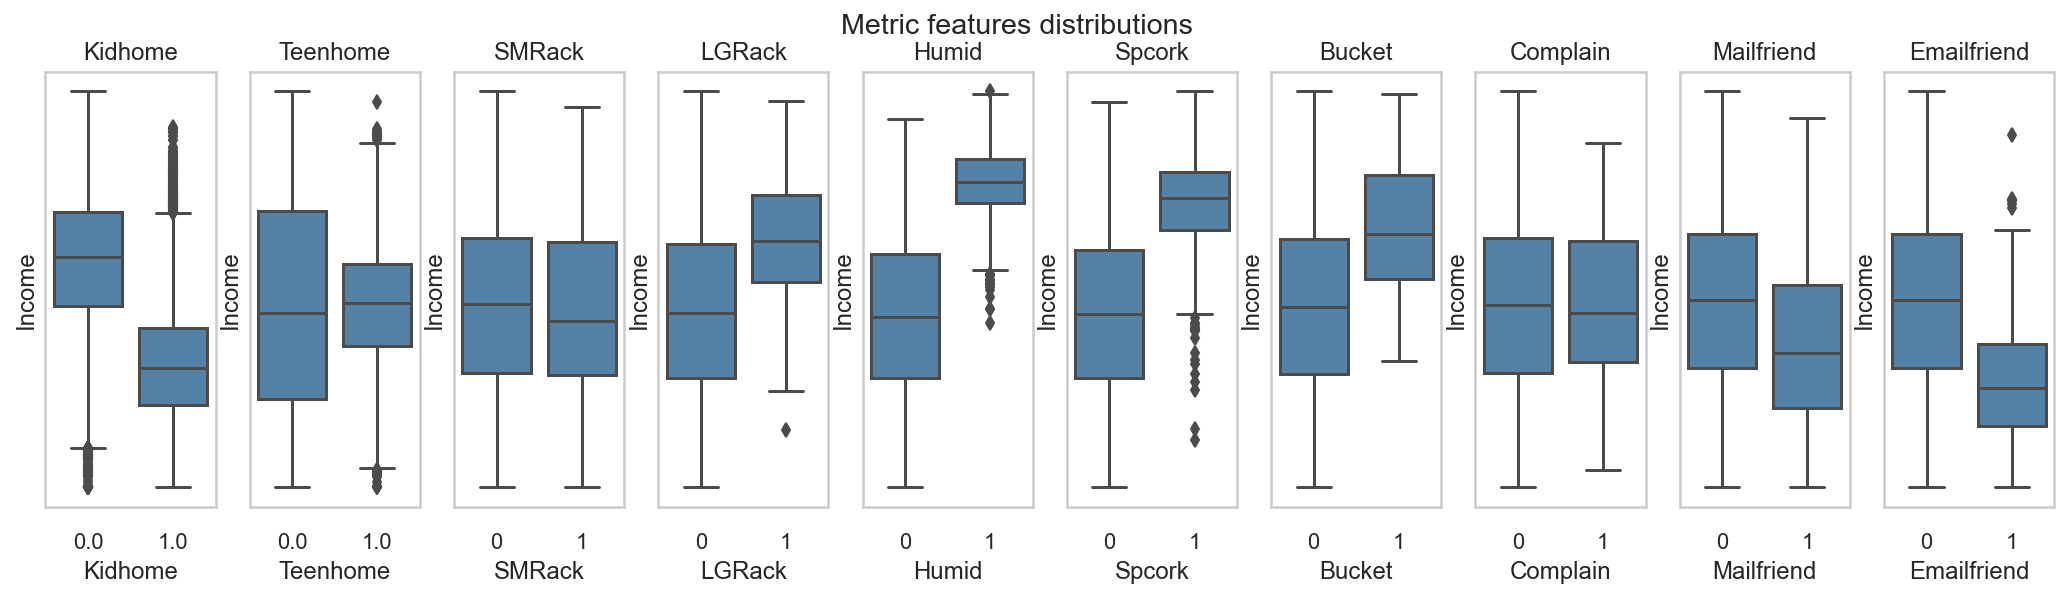

In [13]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set_theme(style="whitegrid")

fig, axs = plt.subplots(1,len(bin_feat))
fig.set_size_inches(18, 4)
fig.suptitle("Metric features distributions")
for met_feat in cont_feat:
    for i, feat in enumerate(bin_feat):
        sns.boxplot(ax = axs[i], data = data, x=feat, y = 'Income', color = 'steelblue')
        axs[i].set_title(feat)
        axs[i].set_yticks([])
    plt.show()

# <font color='#E8800A'>Outlier</font> <a class="anchor" id="fourth-bullet"></a>

- Based on the analysis above, we identified that the data haven't have many outliers. Although, in order to guarantee the good performance of the clustering and modeling we used the Local Outlier Factor (LOF) to remove the multivariate outliers. 

- Before apply the LOF methodology, the data where normalized since it's based in the distance similiarity of the data. 
  [Back to TOC](#toc)

In [14]:
scaler = StandardScaler()
scaled = scaler.fit_transform(data[cont_feat])

In [15]:
lof = LocalOutlierFactor(contamination = 'auto')
lof_out = pd.Series(lof.fit_predict(scaled), index = data[cont_feat].index)
lof_out.value_counts(normalize = True)

 1    0.9996
-1    0.0004
dtype: float64

In [16]:
print('Percentage of data kept after removing multivariate outliers:', np.round(data[lof_out==-1].shape[0]/data.shape[0]*100, 4))

Percentage of data kept after removing multivariate outliers: 0.04


In [17]:
data = data[lof_out.values == 1]

# <font color='#E8800A'>RFM</font> <a class="anchor" id="fifth-bullet"></a>

  [Back to TOC](#toc)

In [18]:
# Feature Eng. to get the mean ticket from our customers
data['MeanTicket'] = data['Monetary']/data['Freq']

In [19]:
#Create star Classification for RFM using 5 partitions or 5 stars.
data['Recency_score'] = pd.qcut(data['Recency'].rank(method='first'), q=5 , labels= (5,4,3,2,1))
data['Recency_score'] = data['Recency_score'].astype(int)
data['Freq_score'] = pd.qcut(data['Freq'].rank(method='first'), q=5 , labels= range(1,6))
data['Freq_score'] = data['Freq_score'].astype(int)
data['Monetary_score'] = pd.qcut(data['MeanTicket'].rank(method='first'), q=5 , labels= range(1,6))
data['Monetary_score'] = data['Monetary_score'].astype(int)

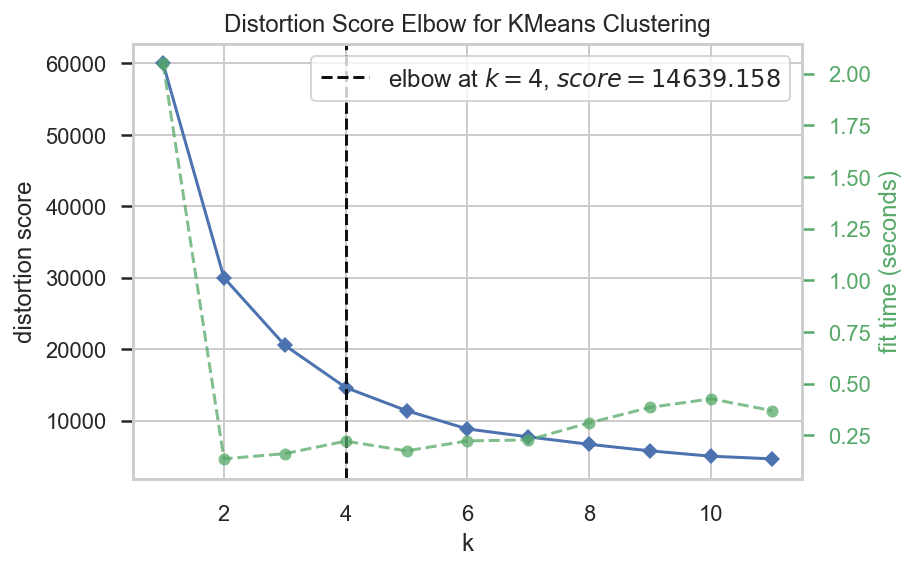

AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

In [20]:
#Check the loss by the number of clusters.
X = data.loc[:,['Recency_score','Freq_score', 'Monetary_score']]
kelbow_visualizer(KMeans(init='k-means++', n_init=15, max_iter=300, random_state=1), X, k=(1,12),
                 timing = False)

In [21]:
#Cluster the customers using just RFM information with 5 clusters.
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=15, max_iter=300, random_state=1)
kmeans.fit(data.loc[:,['Recency_score','Freq_score', 'Monetary_score']])

KMeans(n_clusters=4, n_init=15, random_state=1)

In [22]:
# Assign the labels to data
data['Cluster_RFM'] = kmeans.labels_

In [23]:
# Create RFM Table from cluster
RFM = data.loc[:,['LTV','Recency','Freq', 'MeanTicket','Recency_score','Freq_score', 'Monetary_score','Cluster_RFM']].groupby(['Cluster_RFM']).agg(['mean'])
RFM['Total'] = RFM.loc[:,['Recency_score','Freq_score', 'Monetary_score']].sum(axis = 1)

RFM_Table = round(RFM.sort_values(by = 'Total', ascending = False),2)
RFM_Table

,LTV,Recency,Freq,MeanTicket,Recency_score,Freq_score,Monetary_score,Total
,mean,mean,mean,mean,mean,mean,mean,
Cluster_RFM,,,,,,,,
0,481.22,31.51,27.23,46.28,3.99,4.48,4.49,12.96
2,360.96,81.19,22.42,41.79,1.57,4.02,4.02,9.61
3,26.31,27.68,7.01,23.91,4.17,2.19,2.15,8.51
1,-1.26,123.78,3.02,16.91,1.76,1.42,1.47,4.66


In [24]:
Cluster_Sequence =  round(RFM.sort_values(by = 'Total', ascending = False),2).index.values

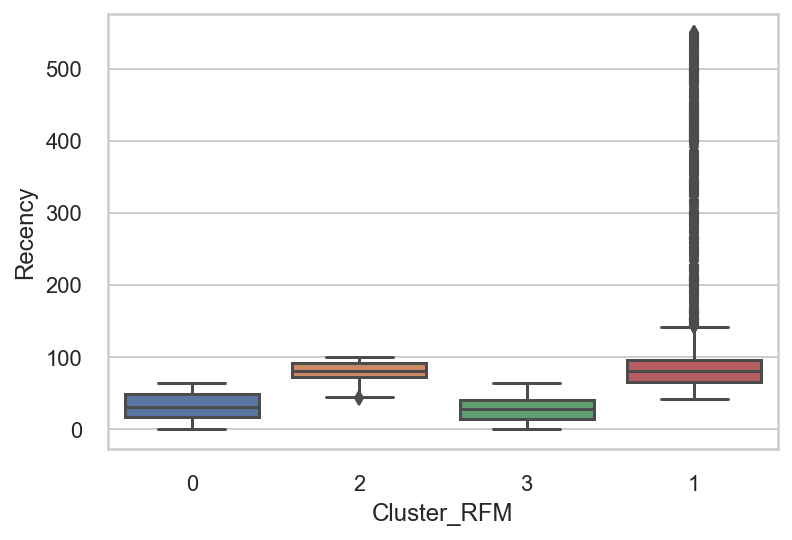

In [25]:
ax = sns.boxplot(x="Cluster_RFM", y="Recency", data=data, order = Cluster_Sequence)

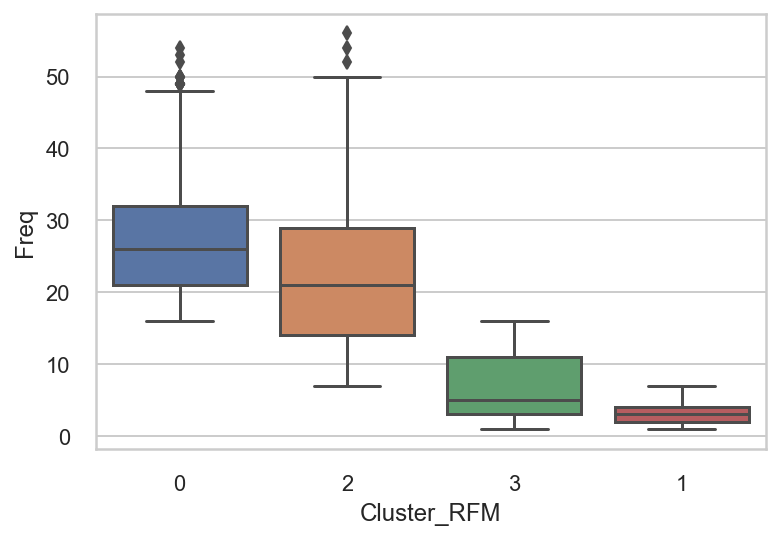

In [26]:
ax = sns.boxplot(x="Cluster_RFM", y="Freq", data=data, order = Cluster_Sequence)

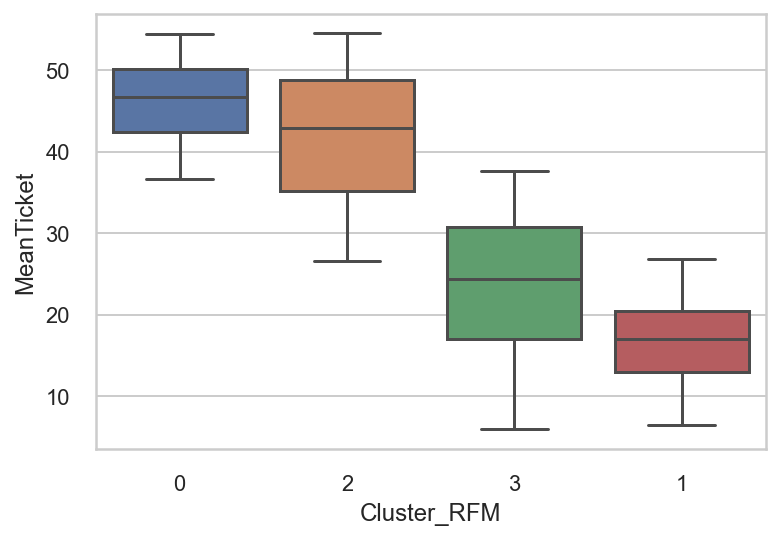

In [27]:
ax = sns.boxplot(x="Cluster_RFM", y="MeanTicket", data=data, order = Cluster_Sequence)

[Text(0, 0, '0'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '1')]

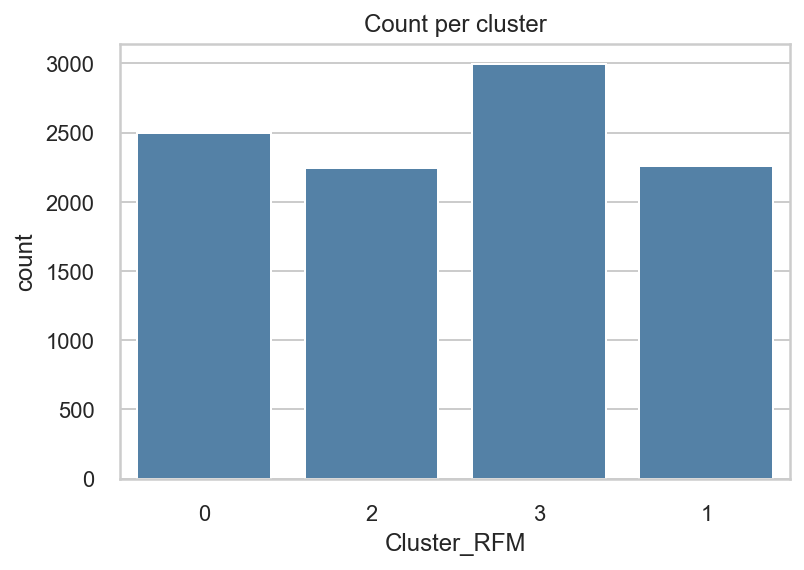

In [28]:
RFM_count = data.loc[:,['Recency_score','Freq_score', 'Monetary_score','Cluster_RFM']].groupby(['Cluster_RFM']).agg(['count'])
RFM_count_index = RFM_count['Recency_score'].reset_index()

%matplotlib inline
%config InlineBackend.figure_format='retina'
g = sns.barplot(x = RFM_count_index['Cluster_RFM'], y = RFM_count_index['count'], color = 'steelblue', order = Cluster_Sequence)
g.set_title('Count per cluster')
g.set_xticklabels(g.get_xticklabels(), rotation=0)

# <font color='#E8800A'>Groups and Normalization</font> <a class="anchor" id="sixth-bullet"></a>
  [Back to TOC](#toc)

In [29]:
# Separate the variable into groups to better cluster them

taste_group = ['Dryred', 'Sweetred', 'Drywh', 'Sweetwh', 'Dessert', 'Exotic', "Access"]
cust_group = [ 'Edu', 'Income', 'WebVisit','Age' ,'LTV', 'Perdeal', "WebPurchase"] 

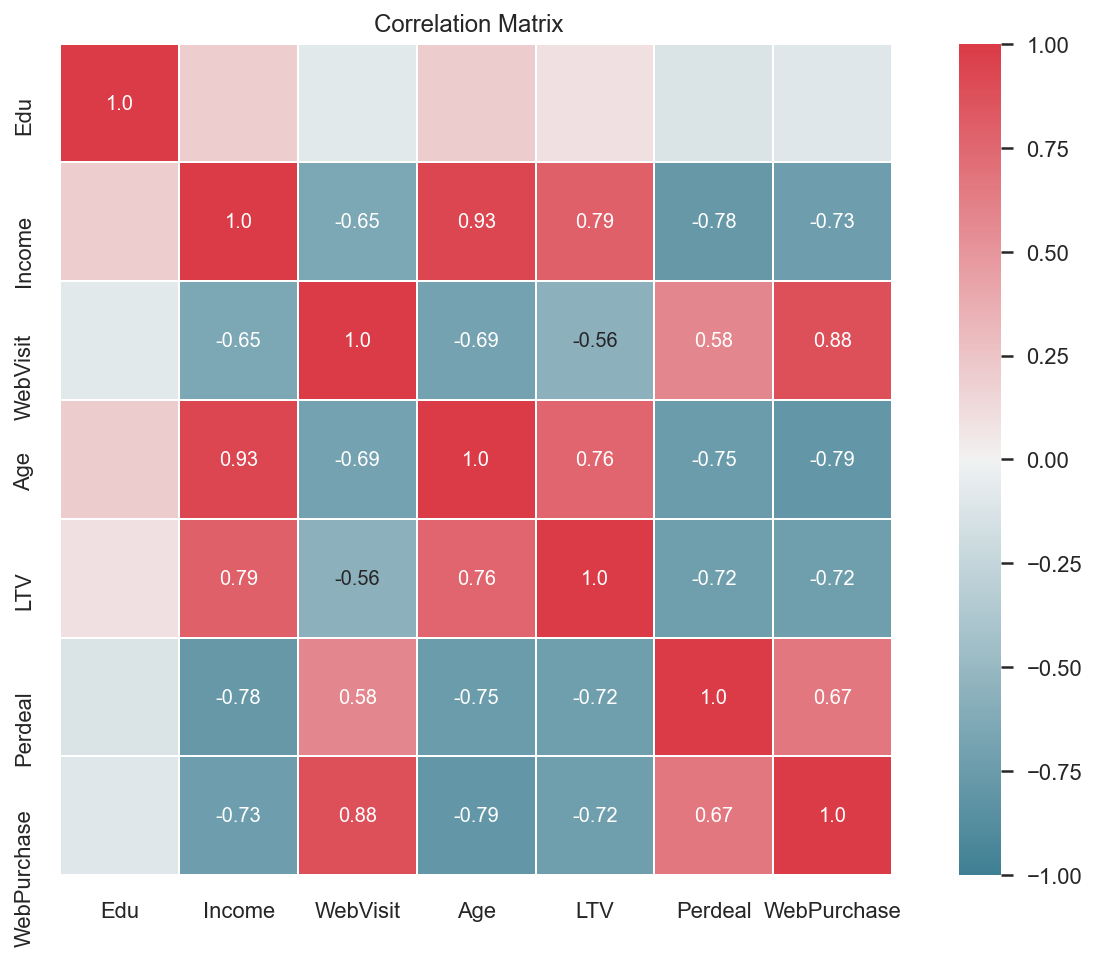

In [30]:
# Correlation analysis for continuous features

fig = plt.figure(figsize=(12, 7))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(data[cust_group].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=12)
plt.show()

- The correlation above shows a high correlation of the features "Age", "LTV", "Perdeal", "WebPurchase", then to improve the following results we decided to drop those. 

In [31]:
excluded_feat = ['Dayswus' ,'Age' ,'LTV', 'Perdeal', "WebPurchase"]

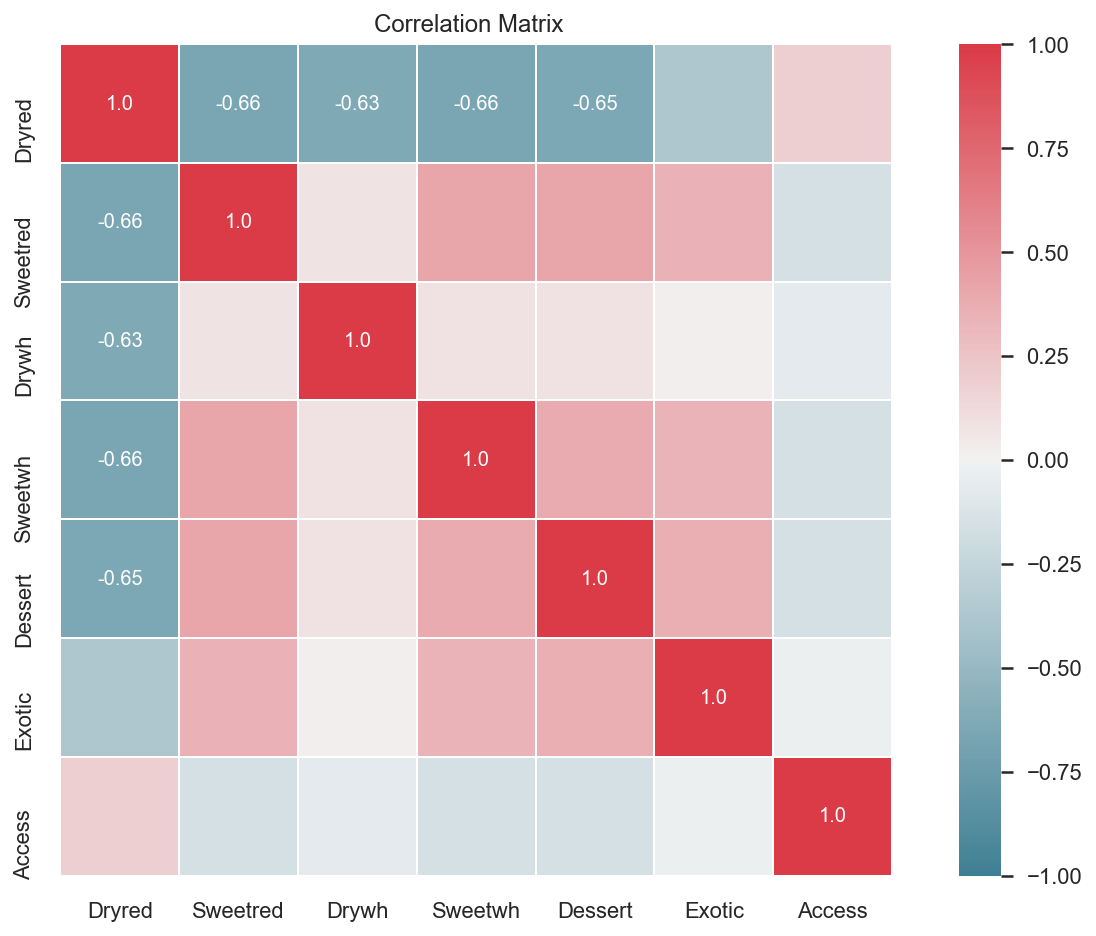

In [32]:
# Correlation analysis for continuous features

fig = plt.figure(figsize=(12, 7))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(data[taste_group].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=12)
plt.show()

### Normalization of data

In [33]:
#Normalize the data set
scaler = MinMaxScaler()
cluster_feat = RFM_group + taste_group + cust_group + excluded_feat
data_no_norm = data.copy()
data[cluster_feat] = scaler.fit_transform(data[cluster_feat])

NameError: name 'RFM_group' is not defined

Defining which is the best number of clusters to each group.Throught the analysis below we are able to indentify that taste_group reached to the optimum number of clusters as 4 and the cust_group, as 3.

In [ ]:
#Check the loss by the number of clusters for taste_group
X = data[taste_group]
kelbow_visualizer(KMeans(init='k-means++', n_init=15, max_iter=300, random_state=1), X, k=(1,12),
                 timing = False)

X = data[cust_group]
kelbow_visualizer(KMeans(init='k-means++', n_init=15, max_iter=300, random_state=1), X, k=(1,12),
                 timing = False)



In [ ]:
#Cluster the customers using id_group 4 clusters.
kmeans_taste = KMeans(init='k-means++', n_clusters=4, n_init=15, max_iter=300, random_state=1)
kmeans_taste.fit(data[taste_group])

#Cluster the customers using cust_group with 4 clusters.
kmeans_cust = KMeans(init='k-means++', n_clusters=3, n_init=15, max_iter=300, random_state=1)
kmeans_cust.fit(data[cust_group])

In [ ]:
#data['Cluster_rfm'] = kmeans_rfm.labels_
data['Cluster_taste'] = kmeans_taste.labels_
data['Cluster_cust'] = kmeans_cust.labels_

In [ ]:
# Centroids of the concatenated cluster labels
df_centroids = data.groupby(['Cluster_taste', 'Cluster_cust'])\
                            [taste_group+cust_group].mean()
df_centroids

In [ ]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(df_centroids)

In [ ]:
# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 2.3
dendrogram(linkage_matrix, truncate_mode='level', labels=df_centroids.index, p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [ ]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=3
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids  # centroid's cluster labels

In [ ]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids['hclust_labels'].to_dict()

df_ = data.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_['merged_labels'] = df_.apply(
    lambda row: cluster_mapper[
        (row['Cluster_taste'], row['Cluster_cust'])
    ], axis=1
)

# Merged cluster centroids
df_.groupby('merged_labels').mean()[RFM_group+taste_group+cust_group]

In [ ]:
#Merge cluster contigency table
# Getting size of each final cluster
df_counts = df_.groupby('merged_labels')\
    .size()\
    .to_frame()

# Getting the product and behavior labels
df_counts = df_counts\
    .rename({v:k for k, v in cluster_mapper.items()})\
    .reset_index()

df_counts['Cluster_cust'] = df_counts['merged_labels'].apply(lambda x: x[0])
df_counts['Cluster_taste'] = df_counts['merged_labels'].apply(lambda x: x[1])
df_counts.pivot('Cluster_cust', 'Cluster_taste', 0)

In [ ]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

## CHANGE THE CLUSTER NAME TO 
0 = LOYAL
1 = Recently clients 
2 = Youngs

In [ ]:
# Profilling each cluster (product, behavior, merged)
cluster_profiles(
    df = df_[RFM_group + taste_group + cust_group + excluded_feat + ['Cluster_taste', 'Cluster_cust', 'merged_labels']],
    label_columns = ['Cluster_taste', 'Cluster_cust', 'merged_labels'], 
    figsize = (28, 13), 
    compar_titles = ["Cluster_taste", "Cluster_cust", "Merged clusters"]
)

# <font color='#E8800A'>RFM and Merged data Analysis</font> <a class="anchor" id="seventh-bullet"></a>
  [Back to TOC](#toc)


In [ ]:
data['merged_labels'] = df_['merged_labels']

In [ ]:
ax = sns.catplot(x="merged_labels", data=data, col = 'Cluster_RFM', kind="count")

In [ ]:
ax.savefig('merge.png') 

In [ ]:
RFM_Table

# <font color='#E8800A'>Decision Tree Evaluation</font> <a class="anchor" id="ninth-bullet"></a>
  [Back to TOC](#toc)

In [ ]:
# Preparing the data
data_no_norm['merged_labels'] = data['merged_labels']
X = data_no_norm.drop(columns=['Cluster_RFM', 'merged_labels', 'Recency_score','Monetary_score', 'Freq_score'])
y = data_no_norm.merged_labels

In [ ]:
# Splitting the data: Train and test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.30, 
                                                    random_state=15, 
                                                    shuffle=True, 
                                                    stratify=y
                                                   )

In [ ]:
# Fitting the decision tree 
dt = DecisionTreeClassifier(splitter="best", random_state=0, max_depth= 9, criterion="gini")
dt.fit(X_train, y_train)

print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))

In [ ]:
# Define the Decision Tree model
dt = DecisionTreeClassifier(random_state=0)

# Define the grid to explore
grid = {
    "criterion": ["entropy", "gini"],
    "splitter": ["random", "best"],
    "max_depth": [3, 6, 9],
    "min_samples_split": [0.005, 0.01, 0.05],
    "max_features": [None, "sqrt"],
    "class_weight": [None, 'balanced', {0: 1, 1: 2}]
    }

In [ ]:
# Instatiating GridSearch
splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
gscv = GridSearchCV(dt, grid, cv=splitter, scoring='f1_micro', refit=True, verbose=0, n_jobs=1)

# Get ID of grid search
# id_num = input("Insert GridSearch ID number: ")
id_num = 1
gscv.fit(X_train, y_train)

In [ ]:
# Saving best model
best_dt = gscv.best_estimator_

print("\nThe hyper-parameters selected are:\n", gscv.best_params_)

In [ ]:
# Binarize the output
y_train = label_binarize(y_train, classes=[0, 1, 2, 3])
n_classes = y_train.shape[1]
classifier = OneVsRestClassifier(DecisionTreeClassifier(class_weight= 'balanced', criterion= 'entropy',
                                                        max_depth= 9, max_features= None, min_samples_split= 0.005, 
                                                        splitter= 'best'))
#classifier.fit(X_train, y_train)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
pred = classifier.predict(X_test)

In [ ]:
y_test= label_binarize(y_test, classes=[0, 1, 2, 3])

In [ ]:
# Test set classification report
print(classification_report(y_test, pred))

## MULTICLASS

https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
MC = MultiOutputClassifier(dt).fit(X_train,y_train)

In [ ]:
predict = MC.predict(X_test)

In [ ]:
MC.score(X_test,y_test)

In [2]:
def func(predict, y_test):
    test = []
    for a,i,j in test,predict,y_test: 
        if i == j: 
            a = 1
        else:
            a = -1
    return test.append(a)
        

In [350]:
y_test

array([[1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0]], dtype=int32)